# Plots of oscilloscope records

In [24]:
import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np


## Read waveforms from the file

XINC: 5e-08    YINC: 0.0004    FRAMES: 508    TRIG: 0.0074    YORIGIN: -79.0
1 , 0.0014 , 0.0158 , 7.3224
2 , 0.0014 , 0.037 , 13.2056
3 , 0.0014 , 0.0206 , 10.038
4 , 0.003 , 0.021 , 12.3512
5 , 0.001 , 0.0294 , 16.3988
6 , 0.0014 , 0.0194 , 10.9456
7 , 0.0006 , 0.0182 , 8.76
8 , 0.0018 , 0.021 , 11.0532
9 , 0.001 , 0.0246 , 10.2412


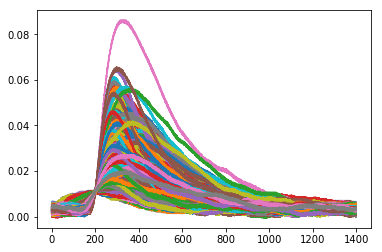

In [25]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np


with h5py.File('./data/data1.h5','r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC')), '   FRAMES:', np.array(hf.get('FRAMES')), '   TRIG:', np.array(hf.get('TRIG')), '   YORIGIN:', np.array(hf.get('YORIGIN'))
    frames = np.array(hf.get('FRAMES'))
    for n in range(1,frames+1):
        data = hf.get(str(n))
        np_data = 1.0*np.array(data)
        np_data += 0.5*np.array(hf.get('YORIGIN'))
        np_data = np.array(hf.get('YINC'))*np_data
        
        plt.plot(np_data)
        #print np_data
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(1400):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma = suma + np_data[i]
        if n<10:
            print n,',', minimum,',', maximum,',', suma

## Parse all data files in current directory
Read in all the data files in current directory and process them into a histogram.

./data/data1.h5 XINC: 5e-08  YINC: 0.0004  FRAMES: 508  YORIGIN: -79.0
./data/data2.h5 XINC: 5e-08  YINC: 0.0004  FRAMES: 0  YORIGIN: -79.0
./data/data3.h5 XINC: 5e-08  YINC: 0.0004  FRAMES: 508  YORIGIN: -79.0
./data/data4.h5 XINC: 5e-08  YINC: 0.0004  FRAMES: 508  YORIGIN: -79.0
./data/data5.h5 XINC: 5e-08  YINC: 0.0004  FRAMES: 508  YORIGIN: -79.0
./data/data6.h5 XINC: 5e-08  YINC: 0.0004  FRAMES: 508  YORIGIN: -79.0
./data/data7.h5

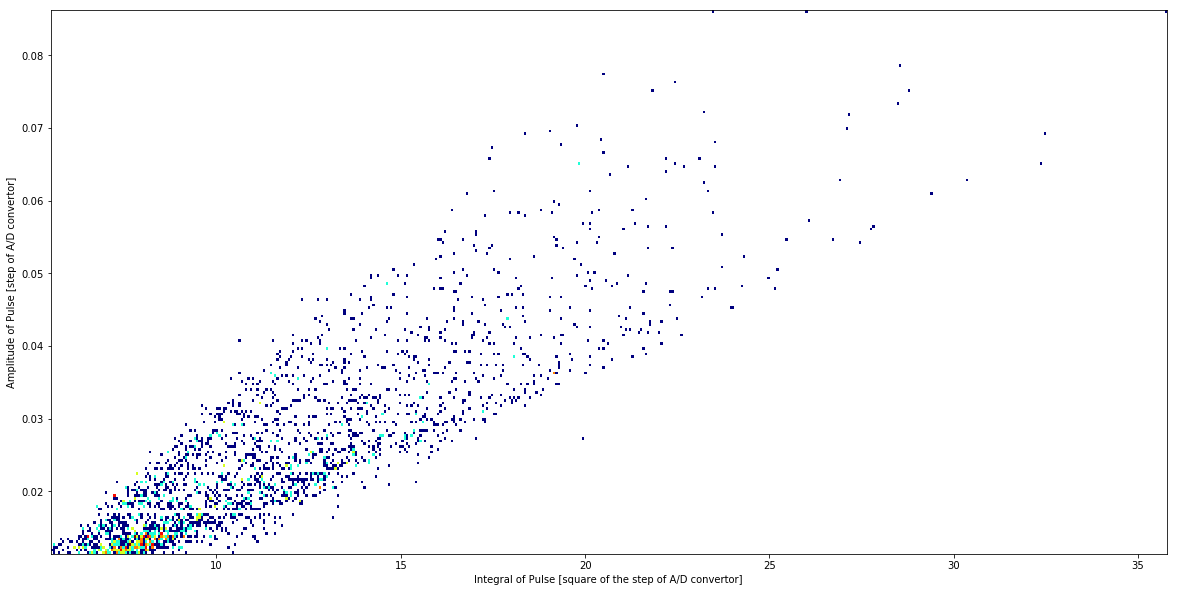

In [28]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = 1.0*np.array(data)
            np_data += 0.5*np.array(hf.get('YORIGIN'))
            np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
     
for f in glob.iglob("./data/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(figsize=(20,10))

ble = plt.hist2d(y, x, bins=(500,200), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D convertor]')
plt.ylabel('Amplitude of Pulse [step of A/D convertor]')
#cb = plt.colorbar()
#cb.set_label('Count')

# Simply replot the current x, y in a nicer way

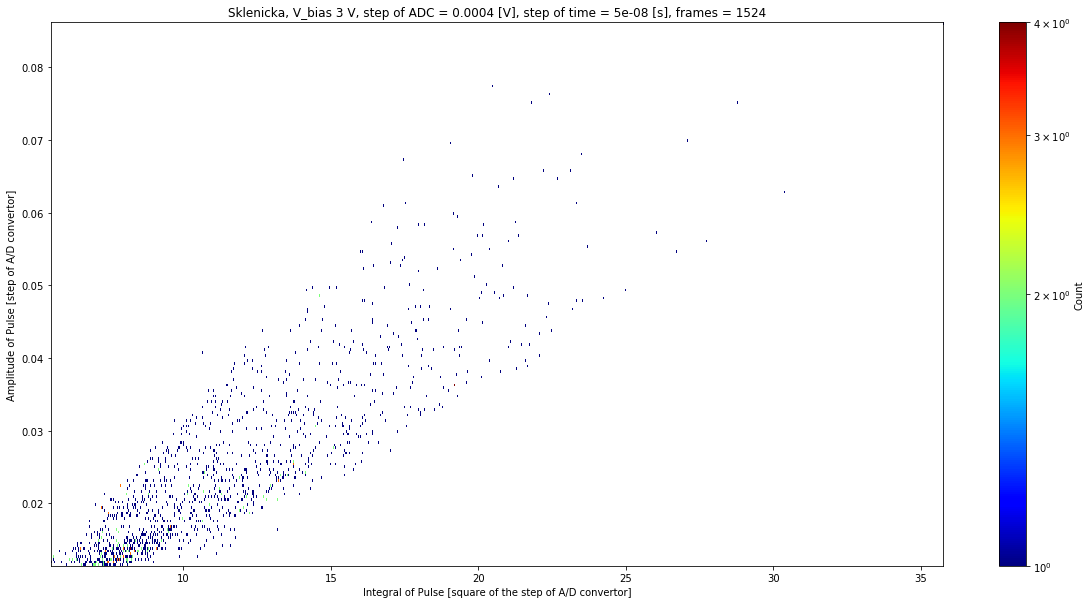

In [27]:
plt.figure(figsize=(20,10))

#ble = plt.hist2d(y, x, bins=(1000,250-50),range=np.array([(70000,160000),(50,250)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ble = plt.hist2d(y, x, bins=(1000,250-50), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(100,30),range=np.array([(70000, 80000),(50,80)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D convertor]')
plt.ylabel('Amplitude of Pulse [step of A/D convertor]')
plt.title('Sklenicka, V_bias 3 V, step of ADC = ' + str(yinc) + ' [V], step of time = ' + str(xinc) + ' [s], frames = '+ str(all_frames))
cb = plt.colorbar()
cb.set_label('Count')